In [1]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import numpy as np

In [96]:
#Villa-Lobos
villa_lobos_cells = gpd.read_file("../../../data/Cidade de São Paulo/Parques/villa_lobos.geojson")

In [111]:
#Villa-Lobos cells polygon
villa_lobos_cells = gpd.read_file("../../../data/Cidade de São Paulo/Parques/villa_lobos_cells.geojson")

In [115]:
villa_lobos_cells["name"] = "Villa Lobos Park"

villa_lobos_cells['ID'] = np.arange(len(villa_lobos_cells))
villa_lobos_cells.set_index('ID', inplace=True)

villa_lobos_cells["poly_type"] = "core"

villa_lobos_cells = villa_lobos_cells[["name", "poly_type", "geometry"]]
villa_lobos_cells

,name,poly_type,geometry
ID,,,
0,Villa Lobos Park,core,"MULTIPOLYGON (((-46.73035 -23.54888, -46.73584..."


In [99]:
#metropolitan region + big cities next São Paulo
sp_regions = gpd.read_file("../../../data/Estado de São Paulo/SP_Region/SP_Region.geojson")

In [100]:
#São Paulo's neighborhoods
neighborhoods =  gpd.read_file("../../../data/Cidade de São Paulo/bairros_sp.geojson")

In [101]:
#merging metropolitan region with neighborhoods
raw_periphery = pd.concat([sp_regions, neighborhoods], ignore_index=True)

In [118]:
#receives the periphery region and the buffer area (ameba's like area - core)
#output: a gdf ready to be used in the API, with ID, name, poly_type and geometry columns 

def ameba_region(ameba, region):
    #catching the intersection
    inter = gpd.overlay(region, ameba, how='intersection')
    
    #region's map with the ameba removed
    res_inter = inter.overlay(region, how='symmetric_difference')
    
    #ameba as a region
    ameba_as_region = pd.concat([res_inter, ameba], ignore_index=True)
    
    ameba_as_region = ameba_as_region[["name", "poly_type", "geometry"]]
    
    #creating the ID column
    ameba_as_region['ID'] = np.arange(len(ameba_as_region))
    ameba_as_region.set_index('ID', inplace=True)
    
    return(ameba_as_region)

In [119]:
park_region = ameba_region(villa_lobos_cells, raw_periphery)

<AxesSubplot: >

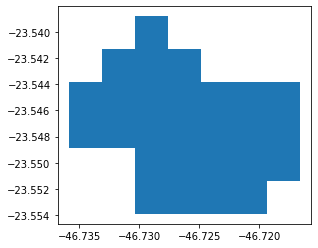

In [120]:
villa_lobos_cells.plot()

In [121]:
import os
dir = '../../../data/Cidade de São Paulo/Parques/'

if not os.path.exists(dir): 
    os.makedirs(dir)
#se essa pasta não existir, crio ela

In [122]:
park_region.to_file(dir + 'villa_lobos_region2.geojson')

In [124]:
park_region[park_region["poly_type"] == "core"]

,name,poly_type,geometry
ID,,,
195,Villa Lobos Park,core,"MULTIPOLYGON (((-46.73035 -23.54888, -46.73584..."
